## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler 
import math

## Load Dataset : 

In [2]:
Dataset = pd.read_csv("Google Dataset.csv")
Dataset

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,GOOG,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,GOOG,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,GOOG,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,GOOG,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,GOOG,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,GOOG,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,GOOG,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,GOOG,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [3]:
Dataset.shape

(1258, 14)

In [4]:
# Dropping 'symble' column
Dataset.drop(columns =['symbol'] , inplace=True)

In [5]:
Dataset.isna().sum()

date           0
close          0
high           0
low            0
open           0
volume         0
adjClose       0
adjHigh        0
adjLow         0
adjOpen        0
adjVolume      0
divCash        0
splitFactor    0
dtype: int64

In [6]:
Dataset['date'].duplicated().sum()

0

In [7]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1258 non-null   object 
 1   close        1258 non-null   float64
 2   high         1258 non-null   float64
 3   low          1258 non-null   float64
 4   open         1258 non-null   float64
 5   volume       1258 non-null   int64  
 6   adjClose     1258 non-null   float64
 7   adjHigh      1258 non-null   float64
 8   adjLow       1258 non-null   float64
 9   adjOpen      1258 non-null   float64
 10  adjVolume    1258 non-null   int64  
 11  divCash      1258 non-null   float64
 12  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 127.9+ KB


In [8]:
Dataset['date'] = pd.to_datetime(Dataset['date'], utc=True)
Dataset

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [9]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype              
---  ------       --------------  -----              
 0   date         1258 non-null   datetime64[ns, UTC]
 1   close        1258 non-null   float64            
 2   high         1258 non-null   float64            
 3   low          1258 non-null   float64            
 4   open         1258 non-null   float64            
 5   volume       1258 non-null   int64              
 6   adjClose     1258 non-null   float64            
 7   adjHigh      1258 non-null   float64            
 8   adjLow       1258 non-null   float64            
 9   adjOpen      1258 non-null   float64            
 10  adjVolume    1258 non-null   int64              
 11  divCash      1258 non-null   float64            
 12  splitFactor  1258 non-null   float64            
dtypes: datetime64[ns, UTC](1), float64(10), int64(2)
memory usage: 127.9 KB


In [10]:
Dataset = Dataset.sort_values(by='date')
Dataset

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14 00:00:00+00:00,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15 00:00:00+00:00,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16 00:00:00+00:00,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17 00:00:00+00:00,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20 00:00:00+00:00,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07 00:00:00+00:00,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08 00:00:00+00:00,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09 00:00:00+00:00,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10 00:00:00+00:00,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [11]:
Dataset['date'] = Dataset['date'].dt.strftime('%Y-%m-%d')
Dataset

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
1,2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2,2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
3,2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
4,2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1253,2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
1254,2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
1255,2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0
1256,2021-06-10,2521.60,2523.260,2494.0000,2494.01,1561733,2521.60,2523.260,2494.0000,2494.01,1561733,0.0,1.0


In [12]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1258 entries, 0 to 1257
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1258 non-null   object 
 1   close        1258 non-null   float64
 2   high         1258 non-null   float64
 3   low          1258 non-null   float64
 4   open         1258 non-null   float64
 5   volume       1258 non-null   int64  
 6   adjClose     1258 non-null   float64
 7   adjHigh      1258 non-null   float64
 8   adjLow       1258 non-null   float64
 9   adjOpen      1258 non-null   float64
 10  adjVolume    1258 non-null   int64  
 11  divCash      1258 non-null   float64
 12  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage: 137.6+ KB


In [13]:
Dataset.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.0,1258.0
mean,1216.317067,1227.430934,1204.176430,1215.260779,1.601590e+06,1216.317067,1227.430936,1204.176436,1215.260779,1.601590e+06,0.0,1.0
std,383.333358,387.570872,378.777094,382.446995,6.960172e+05,383.333358,387.570873,378.777099,382.446995,6.960172e+05,0.0,0.0
min,668.260000,672.300000,663.284000,671.000000,3.467530e+05,668.260000,672.300000,663.284000,671.000000,3.467530e+05,0.0,1.0
25%,960.802500,968.757500,952.182500,959.005000,1.173522e+06,960.802500,968.757500,952.182500,959.005000,1.173522e+06,0.0,1.0
50%,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,1132.460000,1143.935000,1117.915000,1131.150000,1.412588e+06,0.0,1.0
75%,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,1360.595000,1374.345000,1348.557500,1361.075000,1.812156e+06,0.0,1.0
max,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,2521.600000,2526.990000,2498.290000,2524.920000,6.207027e+06,0.0,1.0


In [14]:
DataFrame = Dataset.copy()
DataFrame['date'] = pd.to_datetime(DataFrame['date'])
# Set 'date' column as index
DataFrame = DataFrame.set_index('date')
DataFrame

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
date,,,,,,,,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065,718.27,722.470,713.1200,716.48,1306065,0.0,1.0
2016-06-15,718.92,722.980,717.3100,719.00,1214517,718.92,722.980,717.3100,719.00,1214517,0.0,1.0
2016-06-16,710.36,716.650,703.2600,714.91,1982471,710.36,716.650,703.2600,714.91,1982471,0.0,1.0
2016-06-17,691.72,708.820,688.4515,708.65,3402357,691.72,708.820,688.4515,708.65,3402357,0.0,1.0
2016-06-20,693.71,702.480,693.4100,698.77,2082538,693.71,702.480,693.4100,698.77,2082538,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453,2466.09,2468.000,2441.0725,2451.32,1192453,0.0,1.0
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253,2482.85,2494.495,2468.2400,2479.90,1253253,0.0,1.0
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337,2491.40,2505.000,2487.3300,2499.50,1006337,0.0,1.0


In [15]:
DataFrame.drop(columns =['adjClose','adjHigh','adjLow','adjOpen','adjVolume','divCash','splitFactor'] , inplace=True)
DataFrame

,close,high,low,open,volume
date,,,,,
2016-06-14,718.27,722.470,713.1200,716.48,1306065
2016-06-15,718.92,722.980,717.3100,719.00,1214517
2016-06-16,710.36,716.650,703.2600,714.91,1982471
2016-06-17,691.72,708.820,688.4515,708.65,3402357
2016-06-20,693.71,702.480,693.4100,698.77,2082538
...,...,...,...,...,...
2021-06-07,2466.09,2468.000,2441.0725,2451.32,1192453
2021-06-08,2482.85,2494.495,2468.2400,2479.90,1253253
2021-06-09,2491.40,2505.000,2487.3300,2499.50,1006337


## Spliting the Data as train and test

In [16]:
Training = DataFrame[:'2020'].iloc[:,0:1].values
Test = DataFrame['2020':].iloc[:,0:1].values

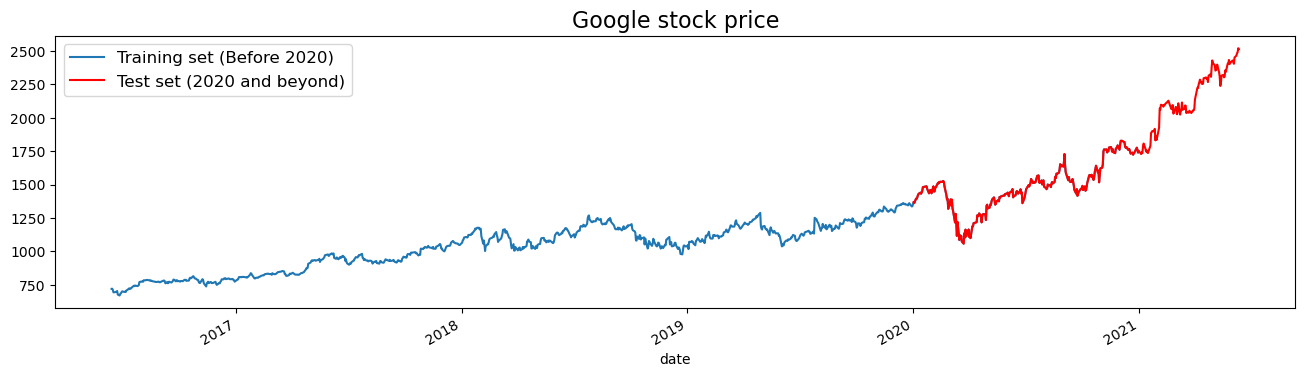

In [17]:
DataFrame['close'][:'2020'].plot(figsize=(16,4),legend=True)
DataFrame['close']['2020':].plot(figsize=(16,4),legend=True, color = 'r')
plt.legend(['Training set (Before 2020)','Test set (2020 and beyond)'], fontsize=12)
plt.title('Google stock price', fontsize=16)
plt.show()

In [18]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
Training_Set_Scaled = sc.fit_transform(Training)

In [19]:
X_train = []
Y_train = []
for i in range(60,1147):
    X_train.append(Training_Set_Scaled[i-60:i,0])
    Y_train.append(Training_Set_Scaled[i,0])
X_train, Y_train = np.array(X_train), np.array(Y_train)

In [20]:
# Reshaping X_train 
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [21]:
Dataset_Total = pd.concat((DataFrame['close'][:'2020'], DataFrame['close']['2020':]),axis=0)
inputs = Dataset_Total[len(Dataset_Total)-len(Test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)

In [22]:
# Preparing X_test
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

## Creating the model

In [23]:
Model = Sequential()

Model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1],1)))
Model.add(Dropout(0.2))

Model.add(LSTM(units = 100, return_sequences = True))
Model.add(Dropout(0.2))

Model.add(LSTM(units = 100, return_sequences = True))
Model.add(Dropout(0.2))

Model.add(layers.LSTM(units = 100, return_sequences = False))
Model.add(layers.Dropout(rate = 0.2))
Model.add(layers.Dense(units = 25))
Model.add(layers.Dense(units = 1))

Model.add(Dense(units = 1))

In [24]:
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 dropout (Dropout)           (None, 60, 100)           0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_1 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 100)           80400     
                                                                 
 dropout_2 (Dropout)         (None, 60, 100)           0         
                                                                 
 lstm_3 (LSTM)               (None, 100)               8

In [25]:
# Compiling the model
Model.compile(optimizer= 'adam', loss = 'mean_squared_error', metrics =['accuracy'])

In [26]:
# Epochs and Batch Size
epochs = 10
batch_size = 32

In [27]:
# Fitting the model 
History =  Model.fit(X_train, Y_train, epochs = epochs, batch_size = batch_size)

Epoch 1/10
34/34 [==============================] - 11s 129ms/step - loss: 0.0199 - accuracy: 9.1996e-04
Epoch 2/10
34/34 [==============================] - 4s 127ms/step - loss: 0.0041 - accuracy: 9.1996e-04
Epoch 3/10
34/34 [==============================] - 4s 123ms/step - loss: 0.0034 - accuracy: 9.1996e-04
Epoch 4/10
34/34 [==============================] - 4s 128ms/step - loss: 0.0038 - accuracy: 9.1996e-04
Epoch 5/10
34/34 [==============================] - 5s 133ms/step - loss: 0.0039 - accuracy: 9.1996e-04
Epoch 6/10
34/34 [==============================] - 4s 126ms/step - loss: 0.0033 - accuracy: 9.1996e-04
Epoch 7/10
34/34 [==============================] - 4s 126ms/step - loss: 0.0029 - accuracy: 9.1996e-04
Epoch 8/10
34/34 [==============================] - 4s 126ms/step - loss: 0.0031 - accuracy: 9.1996e-04
Epoch 9/10
34/34 [==============================] - 4s 125ms/step - loss: 0.0034 - accuracy: 9.1996e-04
Epoch 10/10
34/34 [==============================] - 5s 136ms/s

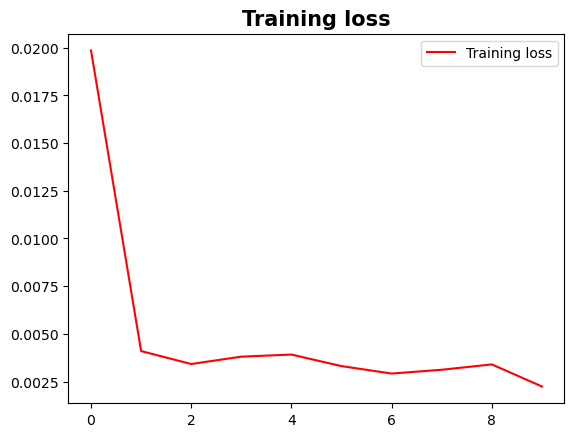

<Figure size 640x480 with 0 Axes>

In [28]:
Loss = History.history['loss']

epochs = range(len(Loss))

plt.plot(epochs, Loss, 'r', label='Training loss')

plt.title('Training loss', size=15, weight='bold')
plt.legend(loc=0)
plt.figure()
plt.show()

In [29]:
prediction = Model.predict(X_test)
prediction = sc.inverse_transform(prediction)

12/12 [==============================] - 2s 40ms/step


## Visualizing the Output

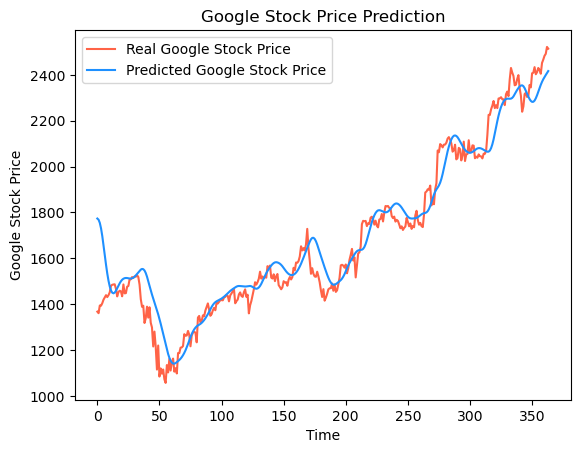

In [30]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='tomato',label='Real Google Stock Price')
    plt.plot(predicted, color='Dodgerblue',label='Predicted Google Stock Price')
    plt.title('Google Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('Google Stock Price')
    plt.legend()
    plt.show()

# Visualizing the results for LSTM
plot_predictions(Test, prediction)